In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
df

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


In [7]:
# Eliminamos la variable (package_name)
df = df.drop(columns=["package_name"])

In [ ]:
# Eliminamos espacios y convertimos a minúsculas el texto en la columna (review)
df["review"] = df["review"].str.strip().str.lower()

In [8]:
print(df.head())

                                              review  polarity
0   privacy at least put some option appear offli...         0
1   messenger issues ever since the last update, ...         0
2   profile any time my wife or anybody has more ...         0
3   the new features suck for those of us who don...         0
4   forced reload on uploading pic on replying co...         0


In [12]:
# Division conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(df["review"], df["polarity"], test_size=0.2, random_state=42)

In [13]:
# Transformar el texto en una matriz de recuento de palabras
vec_model = CountVectorizer(stop_words="english")
x_train_transformed = vec_model.fit_transform(x_train).toarray()
x_test_transformed = vec_model.transform(x_test).toarray()

In [14]:
# Imprimir las primeras filas de X_train_transformed
print(x_train_transformed[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


VAMOS A ENTRENAR LOS TRES MODELOS Y VER LA PRECISIÓN 
    - gaussianNB
    - MultinomialB
    - BernoulliNB

In [16]:
# Inicializar los modelos
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

# Entrenar los modelos
gaussian_nb.fit(x_train_transformed, y_train)
multinomial_nb.fit(x_train_transformed, y_train)
bernoulli_nb.fit(x_train_transformed, y_train)

# Predecir con los modelos
y_pred_gaussian = gaussian_nb.predict(x_test_transformed)
y_pred_multinomial = multinomial_nb.predict(x_test_transformed)
y_pred_bernoulli = bernoulli_nb.predict(x_test_transformed)

# Calcular la precisión de los modelos
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)

# Imprimir la precisión de los modelos
print("Precisión del modelo Gaussian Naive Bayes:", accuracy_gaussian)
print("Precisión del modelo Multinomial Naive Bayes:", accuracy_multinomial)
print("Precisión del modelo Bernoulli Naive Bayes:", accuracy_bernoulli)

Precisión del modelo Gaussian Naive Bayes: 0.8044692737430168
Precisión del modelo Multinomial Naive Bayes: 0.8156424581005587
Precisión del modelo Bernoulli Naive Bayes: 0.770949720670391


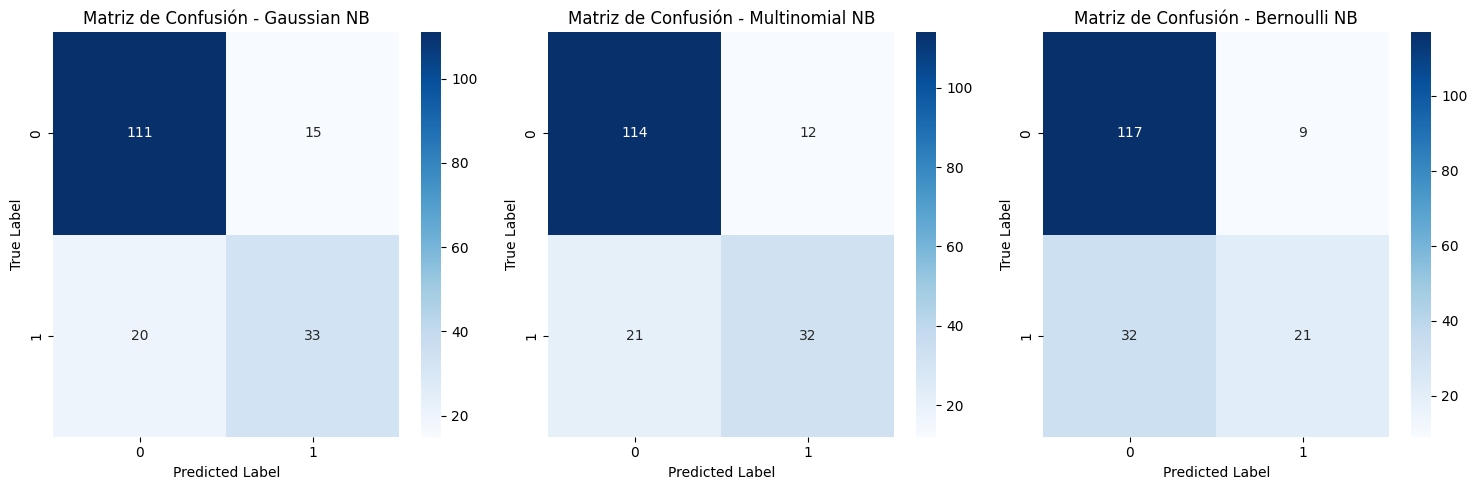

In [18]:
# Creamos matrices de confusion para cada modelo 
conf_matrix_gaussian = confusion_matrix(y_test, y_pred_gaussian)
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_multinomial)
conf_matrix_bernoulli = confusion_matrix(y_test, y_pred_bernoulli)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Matriz de confusión para Gaussian Naive Bayes
sns.heatmap(conf_matrix_gaussian, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - Gaussian NB")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Matriz de confusión para Multinomial Naive Bayes
sns.heatmap(conf_matrix_multinomial, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Multinomial NB")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Matriz de confusión para Bernoulli Naive Bayes
sns.heatmap(conf_matrix_bernoulli, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Matriz de Confusión - Bernoulli NB")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()


OBSERVACIONES 

el modelo que alcanzó la mayor precisión en el conjunto de prueba fue el modelo Multinomial Naive Bayes. (81%)



OPTIMIZACION DE LOS RESULTADOS CON RANDOM FOREST


In [20]:
# Inicializamos el modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Entreno del modelo
random_forest.fit(x_train_transformed, y_train)

# Prediccion con el modelo
y_pred_random_forest = random_forest.predict(x_test_transformed)

# Precision del modelo
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print("Precisión del modelo Random Forest", accuracy_random_forest)

Precisión del modelo Random Forest 0.7988826815642458


OBSERVASIONES

El modelo Random Forest ofrece un resultado ligeramente inferior que el modelo Multinimial


In [28]:
import joblib
import os

# Variable modelo y ruta
modelo_multinomial = multinomial_nb 
nombre_archivo = "modelo_multinomial"
ruta_carpeta = 'C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Random Forest/models'

# Si la carpeta no existe, crearla
if not os.path.exists(ruta_carpeta):
    os.makedirs(ruta_carpeta)
    print("La carpeta se ha creado correctamente.")
else:
    print("La carpeta ya existe.")

# Guardar el modelo en la carpeta especificada
ruta_modelo = os.path.join(ruta_carpeta, nombre_archivo)
joblib.dump(modelo_multinomial, ruta_modelo)
print("El modelo se ha guardado correctamente en:", ruta_modelo)

La carpeta ya existe.
El modelo se ha guardado correctamente en: C:/Users/lenovo/Desktop/Proyectos Machine Learning/Bootcamp/Proyecto Random Forest/models\modelo_multinomial


OTRA ALTERNATIVA DE MODELO

Probemos un modelo de Gradient Boosting, ya que Random Forest no dio un mal resultado.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar y entrenar el modelo Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(x_train_transformed, y_train)

# Predecir con el modelo Gradient Boosting
y_pred_gradient_boosting = gradient_boosting_model.predict(x_test_transformed)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_gradient_boosting = gradient_boosting_model.score(x_test_transformed, y_test)
print("Precisión del modelo Gradient Boosting:", accuracy_gradient_boosting)

Precisión del modelo Gradient Boosting: 0.7318435754189944


COMPARACION DE LAS METRICAS DE LOS TRES MODELOS 


In [36]:
from sklearn.metrics import classification_report

# Evaluar el modelo Multinomial Naive Bayes
print("Métricas del modelo Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_multinomial))

# Evaluar el modelo Gradient Boosting
print("\nMétricas del modelo Gradient Boosting:")
print(classification_report(y_test, y_pred_gradient_boosting))

# Evaluar el modelo Random Forest
print("\nMétricas del modelo Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

Métricas del modelo Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179


Métricas del modelo Gradient Boosting:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       126
           1       0.55      0.49      0.52        53

    accuracy                           0.73       179
   macro avg       0.67      0.66      0.67       179
weighted avg       0.72      0.73      0.73       179


Métricas del modelo Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       126
           1       0.64      0.74      0.68        53

    accuracy                           0.80       179
   macr